In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [13]:
df=pd.read_csv("fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [74]:
df.tail()


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [21]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

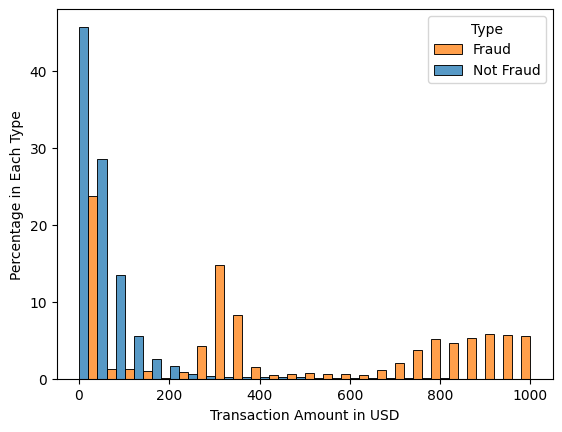

In [38]:
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
#amount vs fraud
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

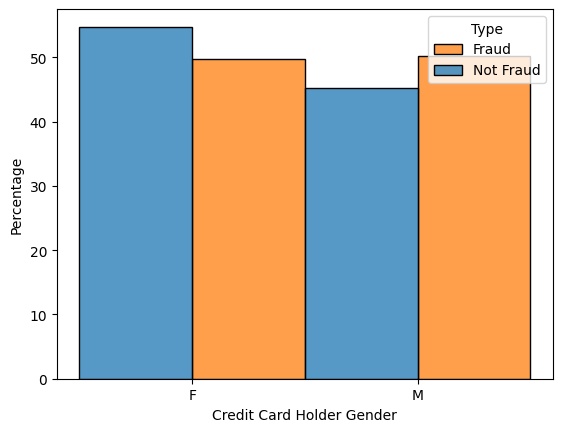

In [32]:
#Relation between Gender and Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [36]:
#determining age of the credit card holder 
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [51]:
#Feature Encoding
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
#one-hot encoding the age variable
age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True)



In [40]:
df1 = pd.concat([df, category_onehot,gender_onehot,age_onehot], axis=1)

df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,age_89,age_90,age_91,age_92,age_93,age_94,age_95,age_96,age_97,age_98
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,0,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,0,0,0,0,0,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#subset the training data to include only the features that we need
train=df[['category','amt','gender','age','is_fraud']]
train

,category,amt,gender,age,is_fraud
0,misc_net,4.97,F,34,0
1,grocery_pos,107.23,F,44,0
2,entertainment,220.11,M,60,0
3,gas_transport,45.00,M,55,0
4,misc_pos,41.96,M,36,0
...,...,...,...,...,...
1296670,entertainment,15.56,M,61,0
1296671,food_dining,51.70,M,43,0
1296672,food_dining,105.93,M,55,0
1296673,food_dining,74.90,M,42,0


In [53]:
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [57]:
test=pd.read_csv("fraudTest.csv")
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test=test[['category','amt','gender','age','is_fraud']]
test

,category,amt,gender,age,is_fraud
0,personal_care,2.86,M,54,0
1,personal_care,29.84,F,32,0
2,health_fitness,41.28,F,52,0
3,misc_pos,60.05,M,35,0
4,travel,3.19,M,67,0
...,...,...,...,...,...
555714,health_fitness,43.77,M,56,0
555715,kids_pets,111.84,M,23,0
555716,kids_pets,86.88,F,41,0
555717,travel,7.99,M,57,0


In [59]:
#convert category to dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values


In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [75]:
df['is_fraud'].value_counts()
#the dataset is highly imbalanced

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [98]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
print(y_train.size)
print(y_resampled.size)

1296675
2578338


In [104]:
print('Share of Non-Fraud in Test Data after SMOTE:',1-round(y_resampled.sum()/len(y_resampled),4))
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Share of Non-Fraud in Test Data after SMOTE: 0.5
Share of Non-Fraud in Test Data: 0.9961


In [90]:
model=LogisticRegression(max_iter=1000)
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.02      0.74      0.04      2145

    accuracy                           0.87    555719
   macro avg       0.51      0.80      0.48    555719
weighted avg       1.00      0.87      0.92    555719



In [91]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[479976  73598]
 [   558   1587]]


In [99]:
print('Accuracy is --> ',round(accuracy_score(y_test,predicted)*100,2))

Accuracy is -->  86.66
